In [2]:
import numpy as np
x = np.matrix([[1,2], [3,4]])
y = np.matrix([[5,6], [7,8]])
print(x*y)

[[19 22]
 [43 50]]


In [3]:
import numpy as np
x = np.matrix([[1,2], [3,4]])
y = np.matrix([[5,6], [7,8]])
print(x.dot(y))

[[19 22]
 [43 50]]


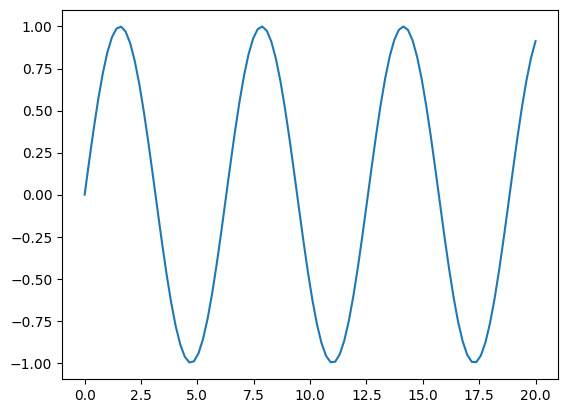

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 20, 100)
plt.plot(x, np.sin(x))
plt.show()

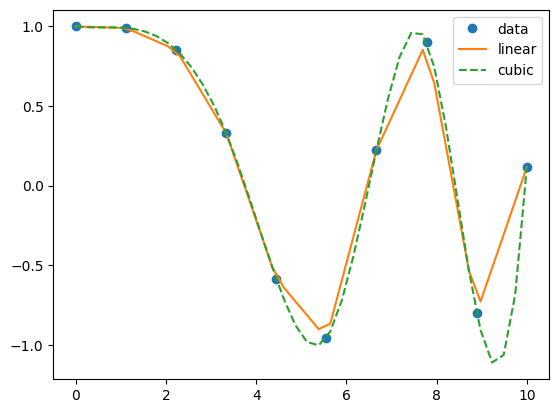

In [5]:
from scipy import interpolate
x = np.linspace(0, 10, 10)
y = np.cos(-x**2/9.0)
f = interpolate.interp1d(x, y)
f2 = interpolate.interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, 40)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.plot(xnew, f(xnew), '-')
plt.plot(xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [6]:
import pandas as pd
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                  index=['cobra', 'viper', 'sidewinder'],
                  columns=['max_speed', 'shield'])
df


,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


from matplotlib import pyplot as plt
df['max_speed'].plot(kind='hist', bins=20, title='max_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['shield'].plot(kind='hist', bins=20, title='shield')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='max_speed', y='shield', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['max_speed']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'max_speed'}, axis=1)
              .sort_values('max_speed', ascending=True))
  xs = counted['max_speed']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('max_speed', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('max_speed')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['shield']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'shield'}, axis=1)
              .sort_values('shield', ascending=True))
  xs = counted['shield']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('shield', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('shield')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['max_speed'].plot(kind='line', figsize=(8, 4), title='max_speed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['shield'].plot(kind='line', figsize=(8, 4), title='shield')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


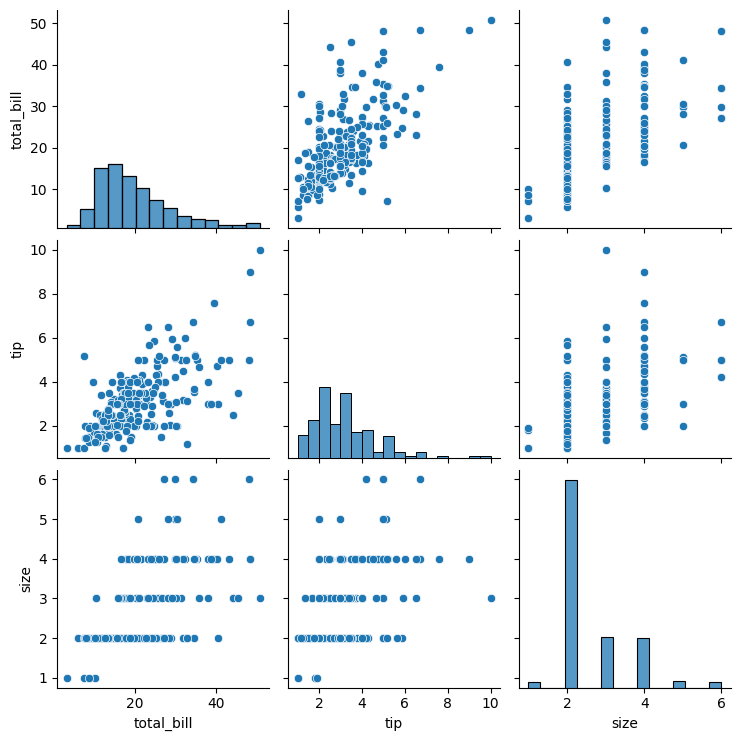

In [9]:
sns.pairplot(tips)

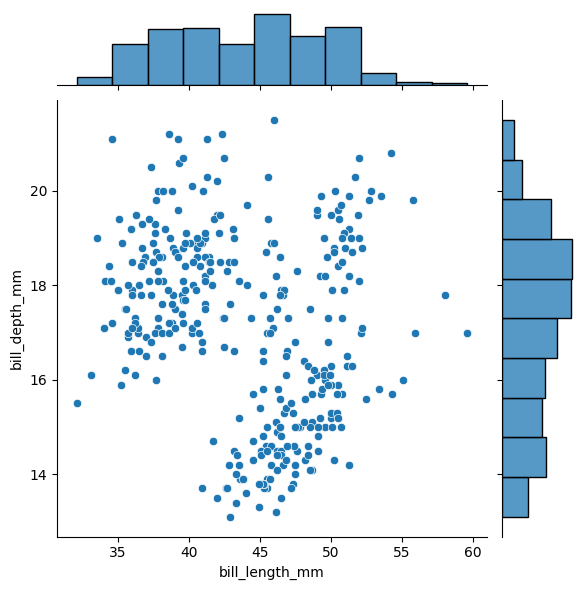

In [10]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


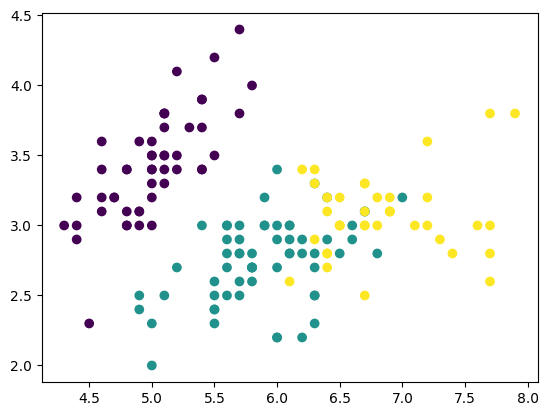

In [11]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
y_k_means = k_means.predict(X_iris)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_k_means, cmap='viridis')
plt.show()

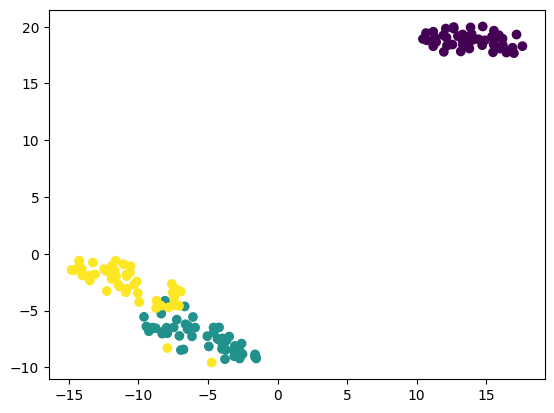

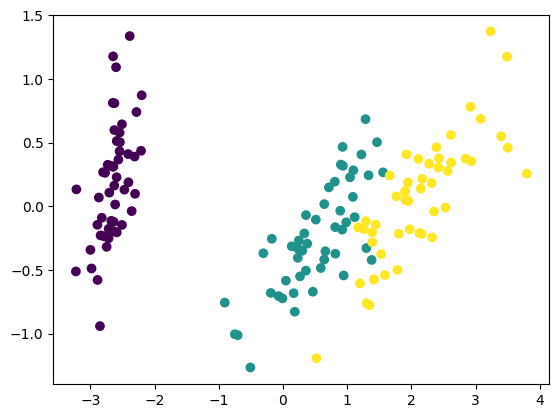

In [12]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tsne = TSNE(learning_rate=100, random_state=0).fit_transform(X_iris)
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_iris, cmap='viridis')
plt.show()

pca = PCA().fit_transform(X_iris)
plt.scatter(pca[:, 0], pca[:, 1], c=y_iris, cmap='viridis')
plt.show()

In [14]:
import torch


# Create a 2x4 tensor
m = torch.Tensor(2,4)
m
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)
print(f'torch.cuda.is_available() = {torch.cuda.is_available()}')
print(f'torch.cuda.device_count() = {torch.cuda.device_count()}')
print(f'torch.cuda.current_device() = {torch.cuda.current_device()}')

torch.cuda.is_available() = True
torch.cuda.device_count() = 8
torch.cuda.current_device() = 0


In [15]:
from matplotlib import colors

In [16]:
colors

<module 'matplotlib.colors' from '/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py'>

In [40]:
# True model

input_dim =1
out_dim = 1

A = 2*np.random.rand(input_dim, out_dim) - 1 # weight
b = 2*np.random.rand(out_dim) - 1  # bias
true_model1 = lambda x: A.dot(x) + b

In [41]:
print(f'A: {A}, b: {b}')

A: [[-0.69364951]], b: [0.76795495]


In [42]:
true_model2 = lambda x: A@x + b

In [43]:
# training data
n_train = 1000
noise_level = 0.04

# Generete a random set of n_train samples
x_train = np.random.rand(n_train, input_dim)
y_train = np.array([true_model1(x) for x in x_train])
y_train += noise_level * np.random.standard_normal(size=y_train.shape)

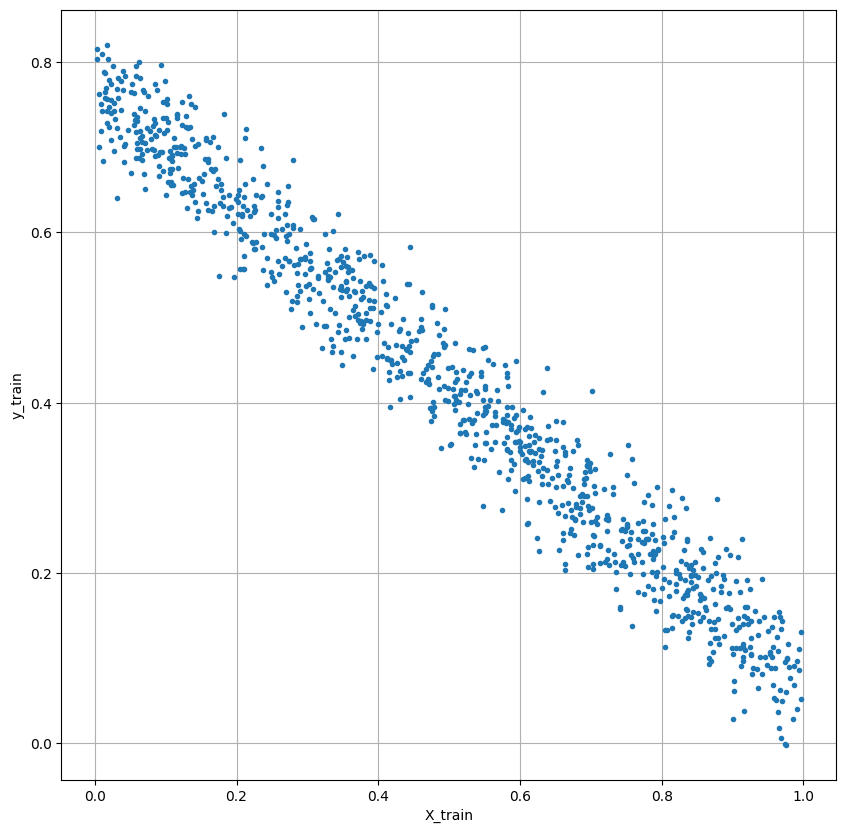

In [44]:
# visualize the training data
if input_dim == out_dim == 1:
    fig = plt.figure(figsize=(10, 10))
    fig.clf()
    ax = fig.gca()
    ax.grid(True)
    ax.plot(x_train, y_train, '.')
    ax.set_xlabel('X_train')
    ax.set_ylabel('y_train')


In [46]:
# Dataset to manage vector to vector data
class VectorialDataset(torch.utils.data.Dataset):
    def __init__(self, input_data, output_data):
        super(VectorialDataset, self).__init__()
        self.input_data = torch.tensor(input_data.astype('f'))
        self.output_data = torch.tensor(output_data.astype('f'))

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        sample =  (self.input_data[index, :], self.output_data[index, :])
        return sample

    def __len__(self):
        return self.input_data.shape[0]

In [47]:
training_set = VectorialDataset(input_data=x_train, output_data=y_train)

In [48]:
len(training_set)

1000

In [49]:
# Show the training dataset
training_set[10:12]

(tensor([[0.4787],
         [0.7505]]),
 tensor([[0.3944],
         [0.2557]]))

In [50]:
# Dataloader
batch_size = 120
train_loader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, shuffle=True)

In [52]:
# Understand the "batchsize"
for idx, batch in enumerate(train_loader):
    print(f'Batch n. %2d: input size=%s, output size=%s' %(idx+1, batch[0].shape, batch[1].shape))

Batch n.  1: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  2: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  3: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  4: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  5: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  6: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  7: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  8: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  9: input size=torch.Size([40, 1]), output size=torch.Size([40, 1])


In [83]:
# Understandig the "shuffle"
first_batch = []

for epoch in range(2):
    for idx, batch in enumerate(train_loader):
        if idx == 0:
            first_batch.append(batch)

np.c_[x_train[:batch_size], first_batch[0][0].numpy(), first_batch[1][0].numpy()]

array([[0.9601433 , 0.94122279, 0.76049739],
       [0.46205124, 0.34519559, 0.6070742 ],
       [0.48501345, 0.72467297, 0.79103327],
       [0.86253454, 0.82874334, 0.69582379],
       [0.16026064, 0.08464385, 0.85830426],
       [0.30468146, 0.1240136 , 0.81428879],
       [0.10911652, 0.82557493, 0.4117204 ],
       [0.2071646 , 0.064202  , 0.51523614],
       [0.83300598, 0.30524316, 0.62099499],
       [0.5267463 , 0.36787149, 0.9049567 ],
       [0.47868839, 0.60747588, 0.02885833],
       [0.75045778, 0.79695398, 0.59990007],
       [0.37620785, 0.01672684, 0.42448059],
       [0.51159144, 0.28020054, 0.91983145],
       [0.66417416, 0.26936123, 0.15708646],
       [0.96758856, 0.50945425, 0.19653741],
       [0.70424002, 0.68418682, 0.97816724],
       [0.38304803, 0.83465624, 0.15086715],
       [0.63255202, 0.40484866, 0.52674633],
       [0.18045632, 0.6425069 , 0.75514138],
       [0.85819781, 0.25852099, 0.2580044 ],
       [0.87567554, 0.98004103, 0.33680868],
       [0.

In [84]:
# Understanding the "Model"
import torch.nn as nn

# Linear model
class LinearModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearModel, self).__init__()
    self.input_dim = input_dim
    self.outout_dim = output_dim
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

  def reset(self):
    self.linear.reset_parameters()

model = LinearModel(input_dim, out_dim)

In [55]:
print(model)

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [56]:
list(model.parameters())

[Parameter containing:
 tensor([[0.1351]], requires_grad=True),
 Parameter containing:
 tensor([-0.0611], requires_grad=True)]

In [57]:
# model's initial parameters
model.linear.weight

Parameter containing:
tensor([[0.1351]], requires_grad=True)

In [58]:
model.linear.bias

Parameter containing:
tensor([-0.0611], requires_grad=True)

In [59]:
x = torch.randn(5, input_dim)
model.forward(x)

tensor([[-0.1457],
        [-0.2022],
        [-0.0553],
        [-0.1022],
        [ 0.1371]], grad_fn=<AddmmBackward0>)

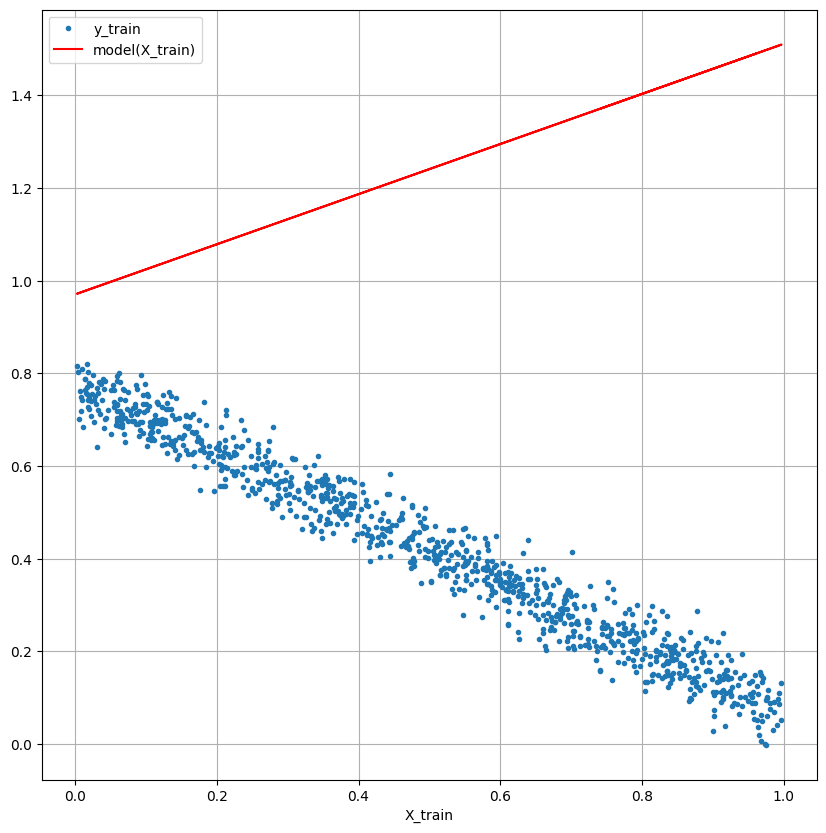

In [85]:
# Visualize the training data and model
if input_dim == out_dim == 1:
    fig = plt.figure(figsize=(10, 10))
    fig.clf()
    ax = fig.gca()
    ax.grid(True)
    ax.plot(training_set.input_data, training_set.output_data, '.')
    ax.set_xlabel('X_train')
    ax.plot(training_set.input_data, model.forward(training_set.input_data).detach().numpy(), 'r-')
    ax.legend(['y_train', 'model(X_train)'])


In [86]:
# Understanding the Loss funcition
loss_fun = nn.MSELoss(reduction='mean')

x = torch.randn(5, input_dim)
y = torch.randn(5, out_dim)

loss_fun(model.forward(x), y)

tensor(4.8130, grad_fn=<MseLossBackward0>)

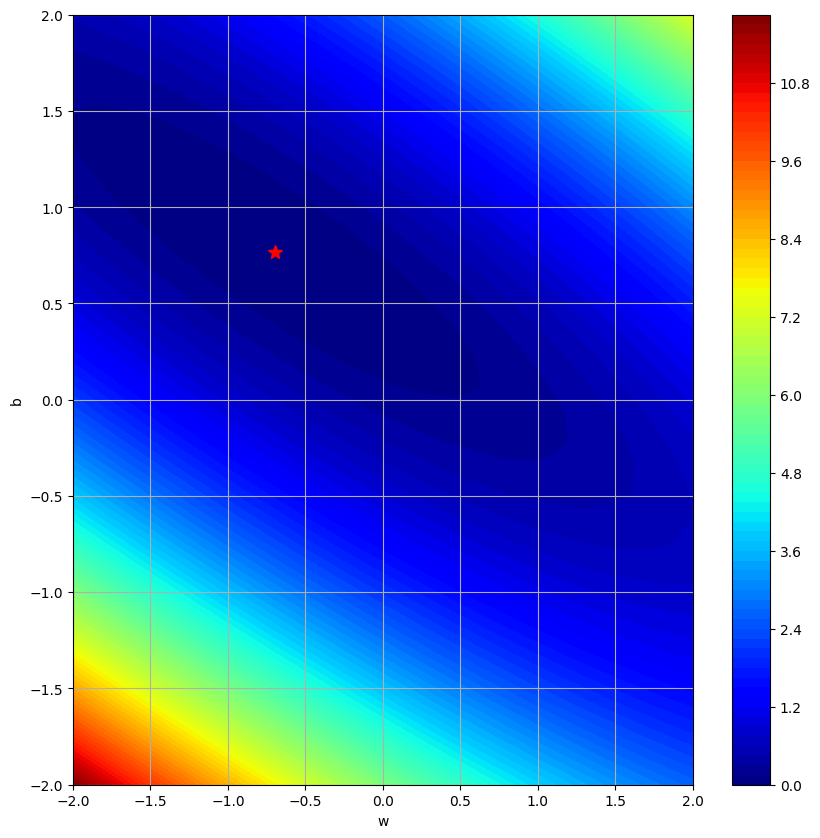

In [87]:
# Visualize the training loss
if input_dim == out_dim == 1:
    fig = plt.figure(figsize=(10, 10))
    fig.clf()
    ax = fig.gca()
    ax.grid(True)

    state_dict = model.state_dict()

    ww, bb = np.meshgrid(np.linspace(-2,2,30), np.linspace(-2,2,30))
    loss = np.zeros(ww.shape)

    for i in range(ww.shape[0]):
        for j in range(ww.shape[1]):
          state_dict['linear.weight'] = torch.tensor([[ww[i,j]]])
          state_dict['linear.bias'] = torch.tensor([bb[i,j]])
          model.load_state_dict(state_dict)
          loss[i,j] = loss_fun(model.forward(training_set.input_data), training_set.output_data).item()

    c = ax.contourf(ww, bb, loss, 100, cmap='jet')
    ax.plot(A[0], b, "r*", markersize=10)
    ax.grid(True)
    plt.colorbar(c)
    ax.set_xlabel('w')
    ax.set_ylabel('b')



In [69]:
# Understanding the "gradient Descent"

x = torch.randn(1, input_dim)
y = torch.randn(1, out_dim)

model.zero_grad()
loss = loss_fun(model.forward(x), y)
loss.backward()

if input_dim == out_dim == 1:
    print(model.linear.weight.grad)
    print(2*x*(model.linear.weight*x + model.linear.bias-y)) #delta{w} = 2*x*(w*x+b-y)
    print(model.linear.bias.grad)
    print(2*(model.linear.weight*x + model.linear.bias-y)) #delta{b} = 2*(w*x+b-y)

tensor([[0.9964]])
tensor([[0.9964]], grad_fn=<MulBackward0>)
tensor([4.1732])
tensor([[4.1732]], grad_fn=<MulBackward0>)


In [78]:
# Understanding the "ADAM" optimization
lr = 0.1
weight_decay = 5e-4

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


n_epochs = 100
train_hist = {}
train_hist['loss'] = []

if input_dim == out_dim == 1:
    train_hist['weight'] = []
    train_hist['bias'] = []

# Initial training
model.reset()
model.train()

for epoch in range(n_epochs):
  for idx, batch in enumerate(train_loader):
    optimizer.zero_grad()
    loss = loss_fun(model.forward(batch[0]), batch[1])
    loss.backward()
    optimizer.step()

    train_hist['loss'].append(loss.item())
    if input_dim == out_dim == 1:
        train_hist['weight'].append(model.linear.weight.item())
        train_hist['bias'].append(model.linear.bias.item())
  print(f'Epoch: {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}')

model.eval()

Epoch: 1/100, Loss: 0.1896
Epoch: 2/100, Loss: 0.1625
Epoch: 3/100, Loss: 0.0749
Epoch: 4/100, Loss: 0.0292
Epoch: 5/100, Loss: 0.0202
Epoch: 6/100, Loss: 0.0131
Epoch: 7/100, Loss: 0.0078
Epoch: 8/100, Loss: 0.0050
Epoch: 9/100, Loss: 0.0037
Epoch: 10/100, Loss: 0.0018
Epoch: 11/100, Loss: 0.0019
Epoch: 12/100, Loss: 0.0016
Epoch: 13/100, Loss: 0.0014
Epoch: 14/100, Loss: 0.0021
Epoch: 15/100, Loss: 0.0022
Epoch: 16/100, Loss: 0.0021
Epoch: 17/100, Loss: 0.0021
Epoch: 18/100, Loss: 0.0022
Epoch: 19/100, Loss: 0.0012
Epoch: 20/100, Loss: 0.0016
Epoch: 21/100, Loss: 0.0014
Epoch: 22/100, Loss: 0.0015
Epoch: 23/100, Loss: 0.0018
Epoch: 24/100, Loss: 0.0016
Epoch: 25/100, Loss: 0.0016
Epoch: 26/100, Loss: 0.0015
Epoch: 27/100, Loss: 0.0015
Epoch: 28/100, Loss: 0.0018
Epoch: 29/100, Loss: 0.0017
Epoch: 30/100, Loss: 0.0026
Epoch: 31/100, Loss: 0.0020
Epoch: 32/100, Loss: 0.0015
Epoch: 33/100, Loss: 0.0017
Epoch: 34/100, Loss: 0.0014
Epoch: 35/100, Loss: 0.0017
Epoch: 36/100, Loss: 0.0016
E

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

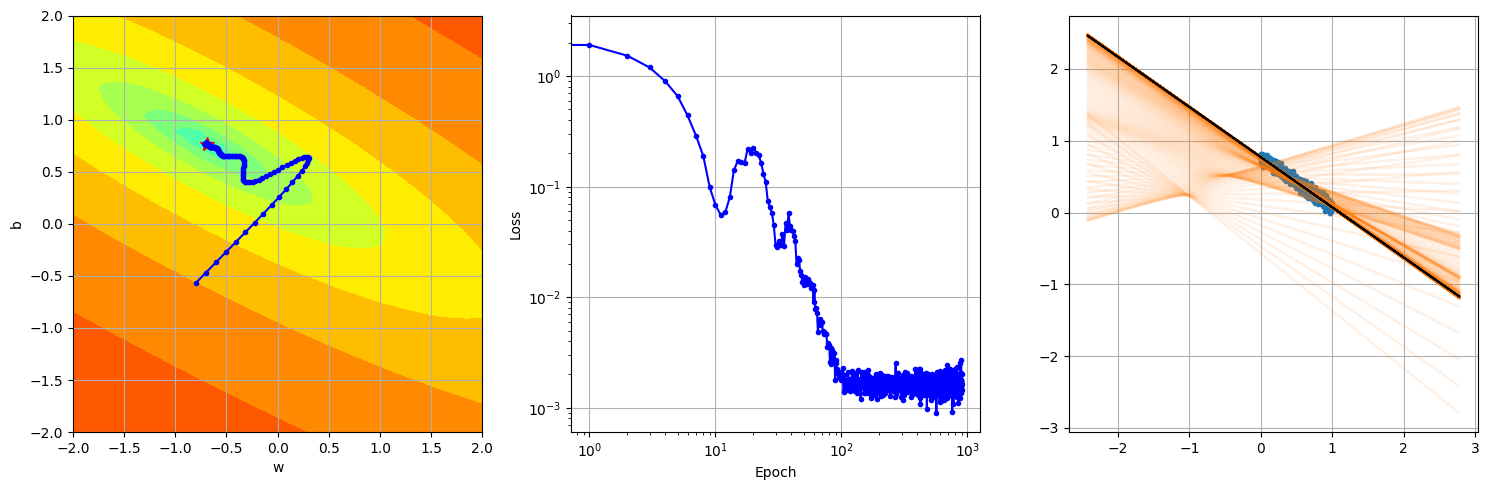

In [95]:
# Visualizing the process of updating the parameters
if input_dim == out_dim == 1:
  n_test = 500
  X_test = np.random.randn(n_test, input_dim)
  y_pred = []

  state_dict = model.state_dict()
  for idx in range(len(train_hist['weight'])):
    state_dict['linear.weight'] = torch.tensor([[train_hist['weight'][idx]]])
    state_dict['linear.bias'] = torch.tensor([train_hist['bias'][idx]])
    model.load_state_dict(state_dict)

    y_pred.append(model.forward(torch.tensor(X_test.astype('f'))).detach().numpy())

if input_dim == out_dim == 1:
  fig = plt.figure(figsize=(15, 5))
  fig.clf()
  ax = fig.add_subplot(1,3,1)
  levels = np.logspace(np.log(np.min(loss)), np.log(np.max(loss)), 20)
  ax.contourf(ww, bb, loss, levels=levels, cmap='jet', norm=colors.LogNorm())
  ax.plot(A[0], b, "r*", markersize=10)
  ax.plot(train_hist['weight'], train_hist['bias'], ".-b")
  ax.set_xlabel('w')
  ax.set_ylabel('b')
  ax.grid(True)
  ax.set_xlim(-2,2)
  ax.set_ylim(-2,2)

  ax = fig.add_subplot(1,3,2)
  ax.loglog(np.abs(train_hist['loss']), ".-b")
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.grid(True)

  ax = fig.add_subplot(1,3,3)
  ax.plot(x_train, y_train, ".")
  a =ax.plot(X_test, y_pred[0], "-", alpha=0.1)
  for y in y_pred[1:]:
    ax.plot(X_test, y, "-", alpha=0.1, color=a[0].get_color())
  ax.plot(X_test, y_pred[-1], 'k')
  ax.grid(True)

  fig.tight_layout()
else:
  fig = plt.figure(figsize=(10, 10))
  fig.clf()
  ax = fig.gca()
  ax.loglog(np.abs(train_hist['loss']), ".-b")
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.grid(True)

  fig.tight_layout()